Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

The wine quality data set contains information on the physicochemical properties of various red and white wines, as well as their quality ratings as assessed by human tasters. Some of the key features of the data set include:

1. Fixed Acidity: This refers to the amount of non-volatile acids in the wine, which contribute to its overall acidity level. Acidity is an important factor in wine quality, as it can affect the taste, balance, and preservation of the wine.
2. Volatile acidity: This measures the amount of volatile acids in the wine, which can contribute to a sour or vinegary taste if present in high amounts. Too much volatile acidity can indicate that the wine is spoiled or has undergone an unintended fermentation.
3. Citric acid: This is a type of fixed acid that can contribute to the flavor and freshness of the wine. It can also help to balance out other flavors and aromas in the wine.
4. Residual sugar: This refers to the amount of sugar that remains in the wine after fermentation has occurred. A higher residual sugar level can contribute to a sweeter taste, while a lower level can result in a drier wine.
5. Chlorides: These are salt compounds that can contribute to the taste and mouthfeel of the wine. In small amounts, they can enhance the flavor of the wine, but too much can result in a salty or briny taste.
6. Free sulfur dioxide: This is a type of preservative that is added to wine to prevent oxidation and spoilage. It can also contribute to the wine's aroma and flavor.
7. Total sulfur dioxide: This measures the total amount of sulfur dioxide in the wine, including both free and bound forms. Too much sulfur dioxide can result in a harsh or sulfurous taste.
8. Density: This measures the mass of the wine per unit volume, which can provide information about its alcohol content and sugar concentration.
9. pH: This is a measure of the wine's acidity level on a scale of 0-14. A lower pH indicates a higher acidity level, while a higher pH indicates a lower acidity level.
10. Alcohol content: This refers to the percentage of alcohol in the wine, which can contribute to its body, aroma, and flavor.

Each of these features plays an important role in predicting the quality of wine. For example, a higher acidity level can contribute to a crisper, more refreshing taste, while a higher alcohol content can result in a richer, fuller-bodied wine. By analyzing these various features, winemakers and tasters can gain insight into the characteristics of different wines and make informed decisions about their quality and composition.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.



In [1]:
import pandas as pd
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



Observation: Wine dataset does not have any missing values.

- If the wine dataset had any missing values first step would be to identify which columns has missing data.
- Assess the Extent of Missing Data: Calculate the percentage of missing data in each column to decide on the handling strategy.
- Handling Missing Data: Depending on the extent and nature of the missing data, different strategies can be applied:
    -  Removing Missing Data: If the dataset is large and the percentage of missing data is low, removing rows with missing values can be an effective strategy.
    - Columns with High Missing Rates: If certain columns have a high percentage of missing data, it might be more practical to drop those columns.
    - Imputation: For numerical features, replace missing values with the mean or median of the column. For categorical features (if any), replace missing values with the mode. Use techniques like K-Nearest Neighbors (KNN) imputation or predictive modeling for more accurate imputation.
- Validation and Verification: Verify that there are no missing values left in the dataset. Compare statistical properties (mean, median, variance) before and after imputation to ensure consistency. 


Imputation techniques are used to handle missing data by filling in the gaps with estimated values. Each imputation method has its own advantages and disadvantages, which should be considered based on the nature of the dataset and the specific analysis needs. Here’s a detailed discussion of various imputation techniques:

- Mean/Median Imputation
    - Advantages: Easy to implement and understand. Requires minimal computational resources. 
    - Disadvantages: Does not account for the underlying data distribution, which can lead to biased estimates.  Imputing with the mean or median reduces the natural variability in the data, potentially leading to misleading results. This method is not applicable to categorical variables.

- Mode Imputation
    - Advantages: Easy to implement for categorical variables. Keeps all data points, maintaining the dataset size.
    - Disadvantages: Can introduce bias, especially if one category is significantly more frequent than others. Does not account for the variability within the data.

- (KNN) Imputation
    - Advantages: Takes into account the relationships and similarities between data points. Often more accurate than mean or median imputation as it uses actual observed values from similar instances.
    - Disadvantages: Can be slow for large datasets due to the need to compute distances between all data points. Outliers can significantly affect the imputed values.The dataset needs to be normalized to ensure fair distance calculations.

- Iterative Imputation
    - Advantages: Handles Complex Relationships: Iteratively models each variable with missing values as a function of other variables, capturing complex interdependencies. Can be applied to a wide range of data types and missing data patterns.
    - Disadvantages: Requires multiple iterations and model fittings, which can be time-consuming. May face issues with convergence, particularly with complex datasets.


Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [3]:
import pandas as pd
stud_data = pd.read_csv('stud.csv')
stud_data.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Gender: Previous research has shown that gender can impact students' academic performance. You could analyze the relationship between gender and exam performance using a t-test or ANOVA to compare the mean exam scores of male and female students.
2. Race/ethnicity: Similar to gender, race/ethnicity can also impact students' academic performance. You could analyze the relationship between race/ethnicity and exam performance using a similar approach as for gender.
3. Parental level of education: Students whose parents have a higher level of education may have better study habits and support systems that contribute to their academic success. You could analyze the relationship between parental level of education and exam performance using a correlation analysis or multiple regression.
4. Lunch: Students who receive free or reduced-price lunches may face additional challenges that impact their academic performance. You could analyze the relationship between lunch status and exam performance using a t-test or ANOVA to compare the mean exam scores of students who receive free or reduced-price lunches versus those who do not.
5. Test preparation course: Students who take test preparation courses may perform better on exams due to improved study strategies and test-taking skills. You could analyze the relationship between test preparation course enrollment and exam performance using a t-test or ANOVA to compare the mean exam scores of students who took the course versus those who did not.
6. Math, reading, and writing scores: These three variables represent the individual subject scores of students on their exams. You could analyze the relationship between these variables and exam performance using correlation analyses or multiple regression.


In [4]:
stud_data['total_score'] = 	stud_data['math_score'] + stud_data['reading_score'] + stud_data['writing_score']
stud_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


There are multiple statistical techniques that can be used to analyze the factors that impact the student performance on exams, including t-tests, ANOVA, correlation analysis and multiple regression . The choice of the technique would depend on type of the question and specifi variables of interest.

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

cat_columns = [feature for feature in stud_data.columns if stud_data[feature].dtypes=='O']
new_col = cat_columns + ['total_score']

model_formula = 'total_score ~ C(gender) + C(race_ethnicity) + C(parental_level_of_education) + C(lunch) + C(test_preparation_course)'
model = ols(model_formula, stud_data[new_col]).fit()

print('ANOVA Table:')
print(anova_lm(model, typ=2))

ANOVA Table:
                                      sum_sq     df           F        PR(>F)
C(gender)                       3.075433e+04    1.0   21.919017  3.241173e-06
C(race_ethnicity)               4.028761e+04    4.0    7.178378  1.068023e-05
C(parental_level_of_education)  7.655039e+04    5.0   10.911694  3.082815e-10
C(lunch)                        1.577991e+05    1.0  112.465474  5.866484e-25
C(test_preparation_course)      1.187781e+05    1.0   84.654713  2.062189e-19
Residual                        1.384849e+06  987.0         NaN           NaN



#observations


Assuming alpha = 0.05

All Variables in above have p-value < 0.05

Hence we reject the null hypothesis.

Conclusion : Total Score is dependent on Gender, Race Ethnicity , parental level of education, lunch and test preperation score

For numerical variables, we can perform correlation analysis.

In [6]:
stud_corr = stud_data.corr(numeric_only=True)
stud_corr

,math_score,reading_score,writing_score,total_score
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
total_score,0.918746,0.970331,0.965667,1.000000



Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Feature engineering is a crucial step in the data preprocessing pipeline, involving the transformation of raw data into meaningful features that can be used to improve the performance of machine learning models. Here's a detailed process of feature engineering in the context of the Student Performance Data Set:

- Data cleaning: Before feature engineering can begin, the data should be cleaned to remove any missing values, inconsistencies, or outliers. This could involve imputing missing values, correcting errors, and removing outliers.

- Feature selection: The next step is to select the variables that are most relevant for predicting exam performance. This could involve examining the correlation between each variable and the target variable (total score), as well as considering domain knowledge and previous research. For example, variables such as math score, reading score, writing score, and test preparation course may be highly relevant for predicting exam performance.

- Feature transformation: Once the relevant variables have been selected, they may need to be transformed in order to improve their predictive power. This could involve creating new variables from existing ones, such as calculating the average of the math, reading, and writing scores, or creating a binary variable to indicate whether or not a student completed a test preparation course. Other transformations could include scaling or standardizing the variables to ensure that they are on the same scale.

- Feature engineering iterations: The feature engineering process is often an iterative one, where the data scientist goes back and forth between selecting and transforming variables until the model performance is optimized. This may involve trying different transformations, selecting different variables, or even collecting additional data.

In [7]:
stud_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [8]:
stud_data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
dtype: int64

#Observation

There are no missing values in the dataset

In [11]:
stud_data.duplicated().sum()

0

#Observation

There are no duplicates in the dataset.

In [12]:
stud_data['average'] = stud_data['total_score']/3
stud_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
X = stud_data.drop(labels=['math_score', 'reading_score', 'writing_score', 'total_score', 'average'],axis =1)
Y = stud_data[['average']]

cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
print('Numerical Columns:  \n', num_cols)
print('Categorical Columns:  \n', cat_cols)

Numerical Columns:  
 []
Categorical Columns:  
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print('One hot encoded features: \n')
X_encoded.head()

One hot encoded features: 



,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1


In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)


In [16]:
xtrain.shape

(800, 12)

In [17]:
xtest.shape

(200, 12)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.fit_transform(xtest),columns=xtest.columns)

In [19]:
xtrain.head()

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,-0.948808,-0.486288,-0.693889,1.720580,-0.411814,-0.369274,-0.498046,4.002659,-0.542677,-0.454573,0.727761,0.731785
1,-0.948808,-0.486288,1.441153,-0.581199,-0.411814,2.708013,-0.498046,-0.249834,-0.542677,-0.454573,-1.374077,-1.366522
2,-0.948808,-0.486288,-0.693889,1.720580,-0.411814,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,-1.374077,0.731785
3,1.053953,-0.486288,1.441153,-0.581199,-0.411814,-0.369274,-0.498046,4.002659,-0.542677,-0.454573,-1.374077,0.731785
4,1.053953,-0.486288,-0.693889,-0.581199,2.428282,-0.369274,2.007846,-0.249834,-0.542677,-0.454573,0.727761,0.731785


In [20]:
xtest.head()

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,-1.030464,-0.476439,1.545908,-0.654654,-0.369274,-0.351562,-0.476439,-0.252646,-0.531085,-0.51558,0.799590,0.808018
1,-1.030464,2.098906,-0.646869,-0.654654,-0.369274,-0.351562,-0.476439,-0.252646,1.882938,-0.51558,-1.250641,-1.237597
2,0.970437,-0.476439,-0.646869,1.527525,-0.369274,2.844452,-0.476439,-0.252646,-0.531085,-0.51558,0.799590,0.808018
3,0.970437,-0.476439,1.545908,-0.654654,-0.369274,-0.351562,-0.476439,-0.252646,1.882938,-0.51558,-1.250641,0.808018
4,0.970437,-0.476439,-0.646869,-0.654654,2.708013,-0.351562,-0.476439,-0.252646,1.882938,-0.51558,0.799590,-1.237597


Data is now ready for Model training.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
#checking null values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Observation:

There are no null values in the dataset.

In [24]:
#Checking duplicate values
wine_data.duplicated().sum()

240

In [25]:
#dropping duplicates
wine_data.drop_duplicates(keep='first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


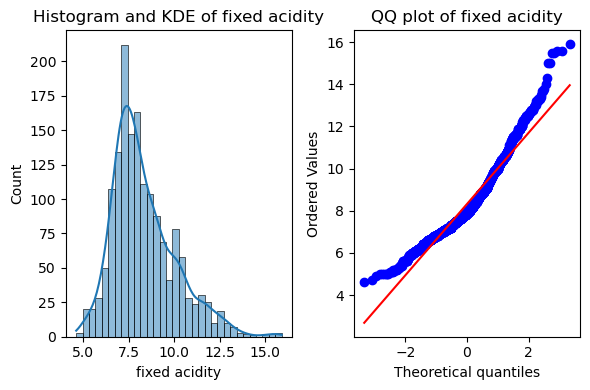

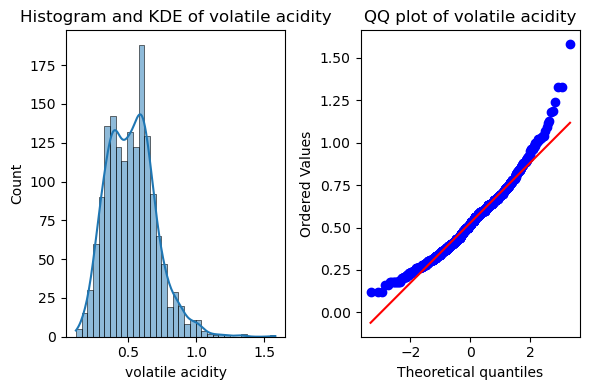

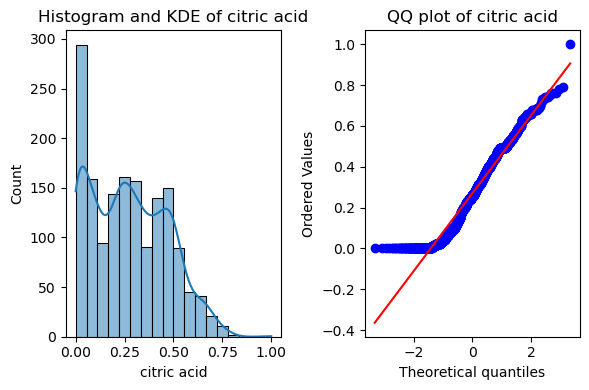

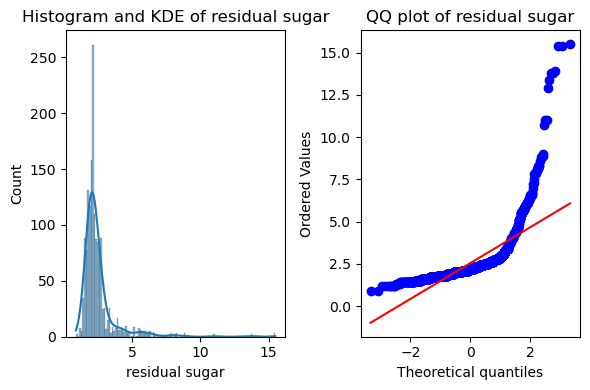

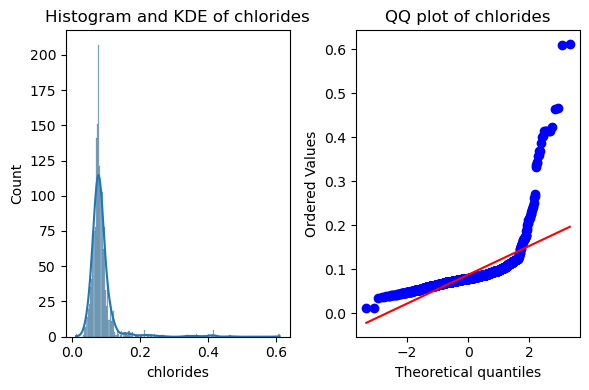

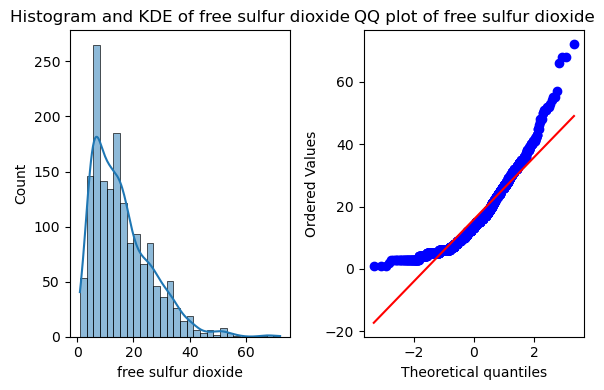

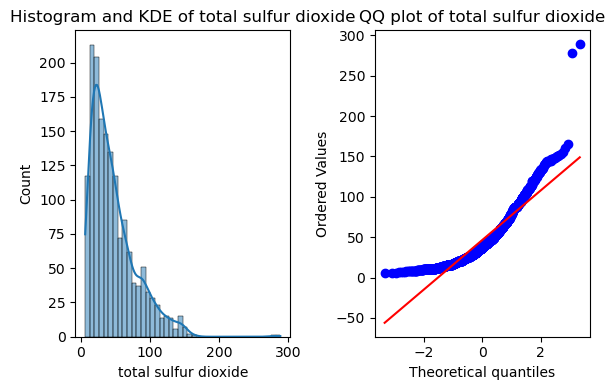

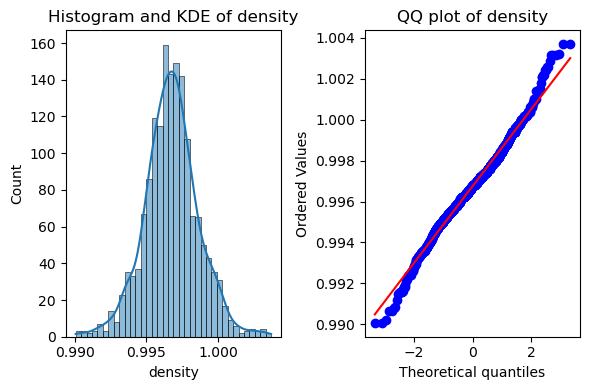

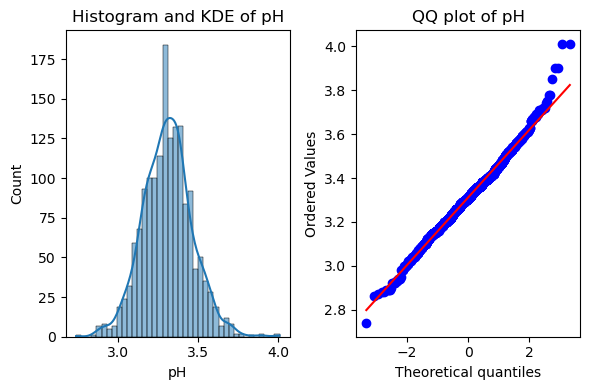

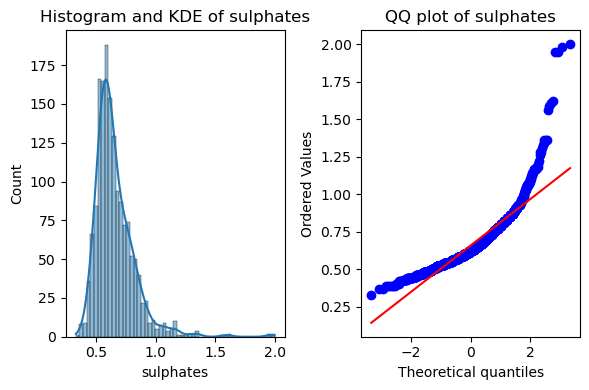

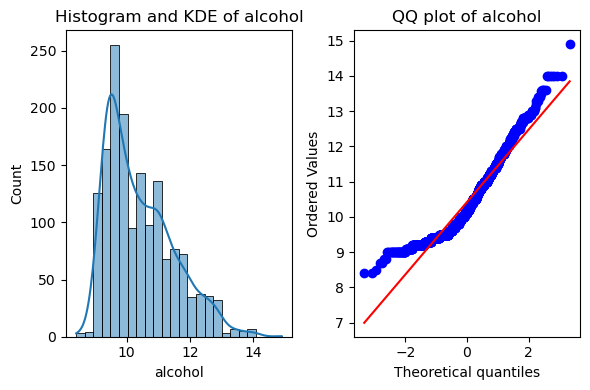

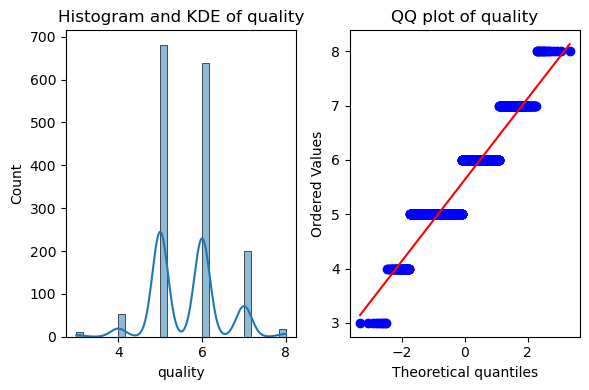

In [26]:
#function to plot QQ plot to check for normality

def plot_histogram_qq(data):
    features = data.columns
    
    for feature in features:
        plt.figure(figsize=(6,4))
        
        plt.subplot(1,2,1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'Histogram and KDE of {feature}')
        
        plt.subplot(1,2,2)
        stats.probplot(data[feature], dist='norm', plot=plt)
        plt.title(f'QQ plot of {feature}')
        
        plt.tight_layout()
        plt.show()
        
plot_histogram_qq(wine_data)
        

#Observation

pH, density and quality are normally distributed. All others are right skewed.

To improve normality, we could apply various transformations such as:
Log transformation: This could be applied to the "residual sugar" feature to reduce the skewness.

Square root transformation: This could be applied to the "density" feature to reduce the skewness.

Box-Cox transformation: This is a more general transformation that can be used to transform a variety of non-normal distributions to normality. It involves finding the optimal lambda value that maximizes the log-likelihood of the data under a Box-Cox transformation. The Scipy library in Python provides a function for calculating the Box-Cox transformation.

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [27]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
X = wine_data.drop(labels=['quality'],axis=1)
Y = wine_data[['quality']]


In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=56)
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1190,9.1,0.40,0.57,4.6,0.080,6.0,20.0,0.99652,3.28,0.57,12.5
888,6.8,0.57,0.00,2.5,0.072,32.0,64.0,0.99491,3.43,0.56,11.2
801,8.6,0.55,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
1162,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8
591,6.6,0.39,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5


In [30]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1340,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5
639,8.9,0.29,0.35,1.9,0.067,25.0,57.0,0.99700,3.18,1.36,10.3
1068,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9
886,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4
1484,6.8,0.91,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.9


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain), columns=xtrain.columns)
xtest = pd.DataFrame(scaler.fit_transform(xtest), columns=xtest.columns)


In [33]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.452051,-0.708266,1.531420,1.380613,-0.165298,-0.944427,-0.797894,-0.122590,-0.178691,-0.505892,1.964141
1,-0.895945,0.243574,-1.403751,-0.042357,-0.331179,1.548705,0.527948,-0.990696,0.811254,-0.564199,0.731648
2,0.159008,0.131593,-0.940303,0.499727,-0.414120,-0.752648,-0.888292,0.324943,-0.508672,-1.263886,-0.406037
3,0.100400,-1.156190,0.759006,-0.177878,-0.268974,-0.369089,-0.828026,-1.298038,-1.102639,0.310410,1.300491
4,-1.013163,-0.764256,1.119466,-0.584441,-0.372649,0.685697,3.089232,-2.451917,-1.234632,-0.914042,1.016069


In [34]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.418727,-0.128026,-1.242448,-0.676181,-0.034483,-0.281796,-0.487240,-0.678577,0.199548,-0.768842,0.088745
1,0.329537,-1.346824,0.434690,-0.494428,-0.439639,0.853669,0.334206,0.127376,-0.897206,4.328282,-0.092040
2,1.505380,-1.236024,1.349493,-0.221797,-0.606469,-1.228017,-1.150715,-0.509427,-1.872099,1.033799,0.450315
3,0.382984,1.478572,-0.734224,-0.040043,-0.058316,-0.754907,-0.582022,0.803979,0.016756,-0.085082,-0.001648
4,-0.792859,2.087971,-1.039159,-0.403551,-0.606469,-1.133395,-1.119121,-0.409926,1.235372,-0.147242,0.450315


In [35]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(xtrain)
output_cols = pca.get_feature_names_out()
print(f'Output Columns: {output_cols}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


Output Columns: ['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6']
Explained variance ratio: [0.27374416 0.17931096 0.14120952 0.11130894 0.08661386 0.06215981
 0.05244379]


In [36]:
xtrain_pca = pd.DataFrame(pca.transform(xtrain), columns = output_cols)
xtest_pca = pd.DataFrame(pca.transform(xtest), columns = output_cols)

In [37]:
xtrain_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,1.020694,-1.880895,0.748610,-1.379659,1.495645,0.920255,0.326057
1,-2.247523,0.789783,1.161026,-0.242194,-0.107337,0.285457,-0.226211
2,-0.318402,-0.285639,-1.559077,-0.970248,0.129765,0.371418,0.599004
3,0.554356,-2.087261,1.236879,-0.042476,-0.259716,0.796974,0.277023
4,-0.632994,0.445374,3.106656,-0.429668,-2.147096,2.047180,0.677805


In [38]:
xtest_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6
0,-1.393294,-0.575613,-0.468227,0.160351,-0.466019,0.221034,0.402893
1,1.998099,-0.212530,2.215595,1.917213,-0.233267,-2.057310,-1.500498
2,2.396202,-2.447486,0.218379,-0.151778,-0.554273,0.277154,-0.184776
3,-0.235040,0.039298,-1.713553,0.030147,0.562345,0.242987,-1.005045
4,-2.323899,-0.807474,-1.588938,0.319050,0.869480,0.162782,-1.106271


In [39]:
print(f'Minimum Number of components required to explain 90% variance is {xtrain_pca.shape[1]}')

Minimum Number of components required to explain 90% variance is 7


PCA is completed with minimum 7 components required to explain 90% variance